In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [2]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
del data['User ID']

In [4]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
data = data.drop_duplicates()
data.shape

(380, 4)

In [6]:
data.describe()
     

,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
upper_threshold = data.Age.quantile(0.75) + (IQR*1.5)
lower_threshold = data.Age.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(3.5, 71.5)

In [8]:
IQR = data.EstimatedSalary.quantile(0.75) - data.EstimatedSalary.quantile(0.25)
upper_threshold = data.EstimatedSalary.quantile(0.75) + (IQR*1.5)
lower_threshold = data.EstimatedSalary.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(-24500.0, 155500.0)

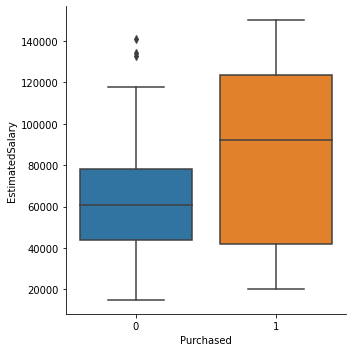

In [9]:
sns.catplot(data=data, x="Purchased", y="EstimatedSalary", kind="box")
     

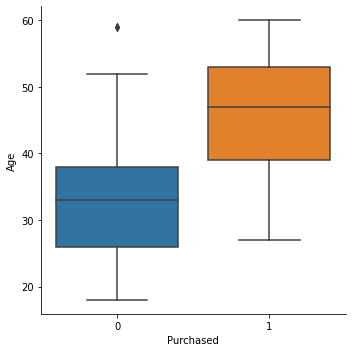

In [10]:
sns.catplot(data=data, x="Purchased", y="Age", kind="box")
     

In [11]:
data['Gender'].value_counts(normalize = True)

Female    0.521053
Male      0.478947
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

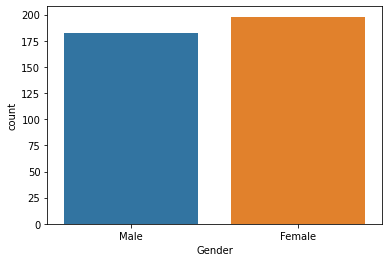

In [12]:
sns.countplot(x= data['Gender'],data = data)

In [13]:
data =pd.get_dummies(data,columns = ['Gender'],drop_first = True)
     

**Splitting the dataset into the Training set and Test set**

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(['Purchased'],axis =1)
y = data['Purchased']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
     

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
     

In [16]:
x_test.shape
     

(76, 3)

**Fitting K-NN to the Training set**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**Predicting the Test set results**

In [23]:
from sklearn.model_selection import cross_val_score 
print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
     

Train Accuracy :  0.8092105263157895
Val Accuracy :  0.7927956989247311


In [25]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
 knn = KNeighborsClassifier(i) #initialising the model
 knn.fit(x_train,y_train) # training the model
 print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  0.9967105263157895  cv score :  0.8683870967741936
K value  :  2  train score :  0.9342105263157895  cv score :  0.8523655913978494
K value  :  3  train score :  0.930921052631579  cv score :  0.8850537634408602
K value  :  4  train score :  0.9111842105263158  cv score :  0.8918279569892473
K value  :  5  train score :  0.9177631578947368  cv score :  0.8949462365591397
K value  :  6  train score :  0.9177631578947368  cv score :  0.882043010752688
K value  :  7  train score :  0.9111842105263158  cv score :  0.8949462365591397
K value  :  8  train score :  0.9111842105263158  cv score :  0.8820430107526882
K value  :  9  train score :  0.9046052631578947  cv score :  0.8949462365591397
K value  :  10  train score :  0.9078947368421053  cv score :  0.8981720430107527
K value  :  20  train score :  0.9078947368421053  cv score :  0.8754838709677418
K value  :  50  train score :  0.8092105263157895  cv score :  0.7927956989247311


In [26]:
knn = KNeighborsClassifier(7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test) 
     

0.9078947368421053

In [27]:
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

**Making the Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=  y_test , y_pred = y_pred)
print('confusion matrix:/n:',cm)

confusion matrix:/n: [[47  3]
 [ 4 22]]


In [29]:
from sklearn.metrics import  roc_auc_score

print('print Auroc score :',roc_auc_score(y_pred, y_test) )


print Auroc score : 0.9007843137254903
